In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [3]:
df = pd.read_csv("C:\\Users\\sange\\OneDrive\\Attachments\\Desktop\\dataset\\Sampledataset.csv",encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Convert dates
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Create new features
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df["Discount Level"] = pd.cut(
    df["Discount"],
    bins=[-0.01, 0, 0.2, 0.5, 1],
    labels=["No Discount", "Low", "Medium", "High"]
)

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Year              0
Month             0
Discount Level    0
dtype: int64

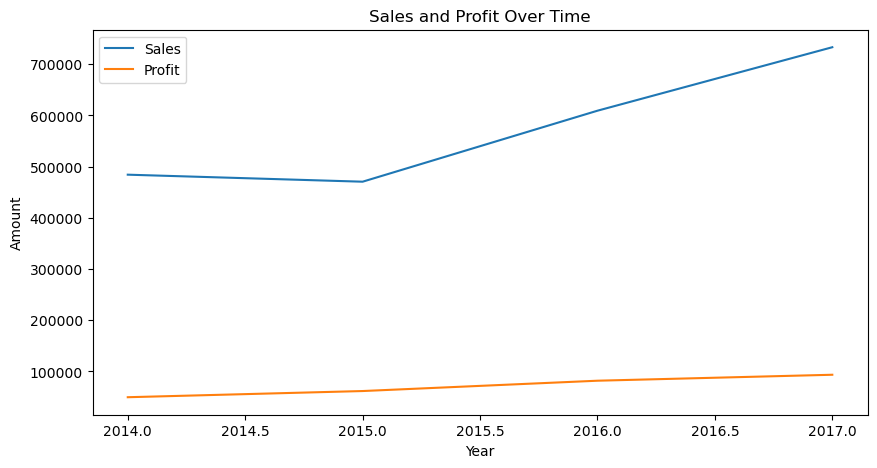

In [5]:
sales_time = df.groupby("Year")[["Sales", "Profit"]].sum()

sales_time.plot(kind="line", figsize=(10,5))
plt.title("Sales and Profit Over Time")
plt.ylabel("Amount")
plt.show()

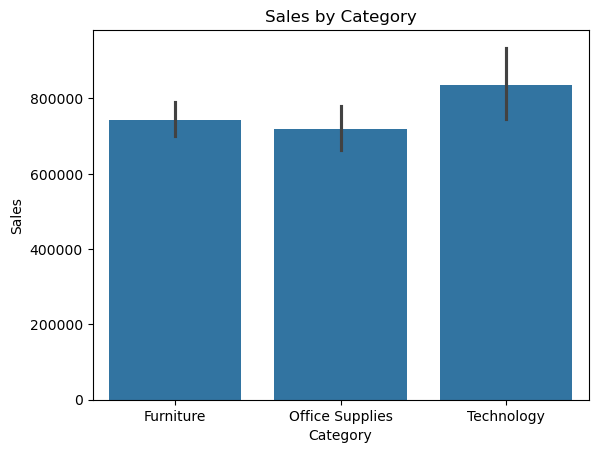

In [6]:
sns.barplot(
    data=df,
    x="Category",
    y="Sales",
    estimator=sum
)
plt.title("Sales by Category")
plt.show()

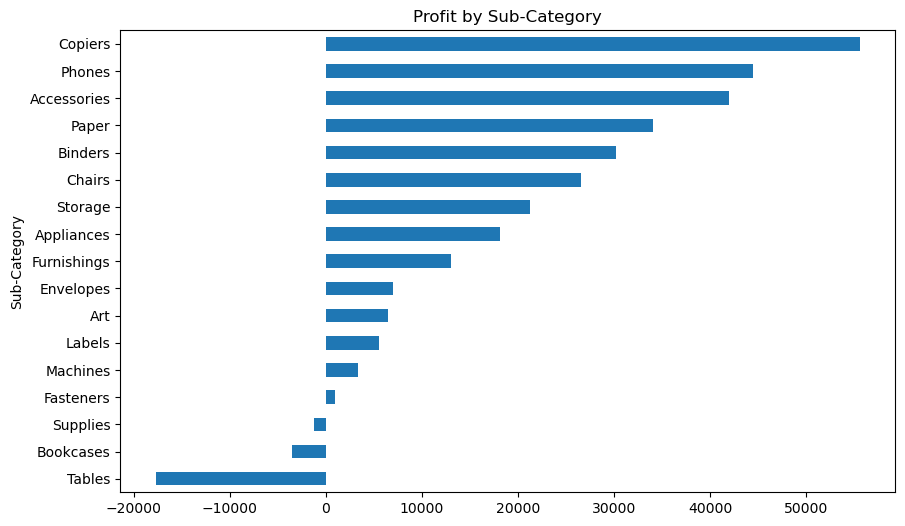

In [7]:
profit_sub = df.groupby("Sub-Category")["Profit"].sum().sort_values()

profit_sub.plot(kind="barh", figsize=(10,6))
plt.title("Profit by Sub-Category")
plt.show()

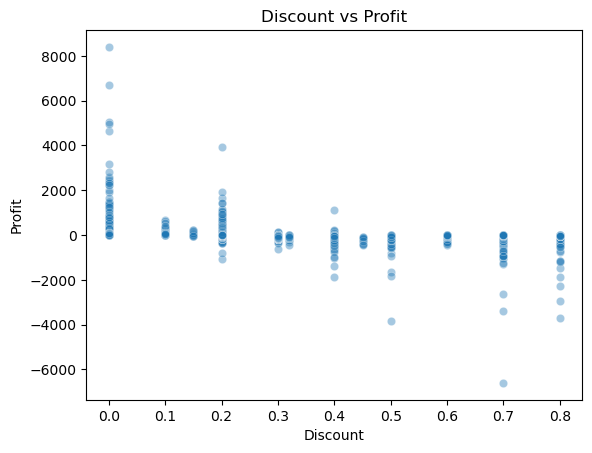

In [8]:
sns.scatterplot(
    data=df,
    x="Discount",
    y="Profit",
    alpha=0.4
)
plt.title("Discount vs Profit")
plt.show()

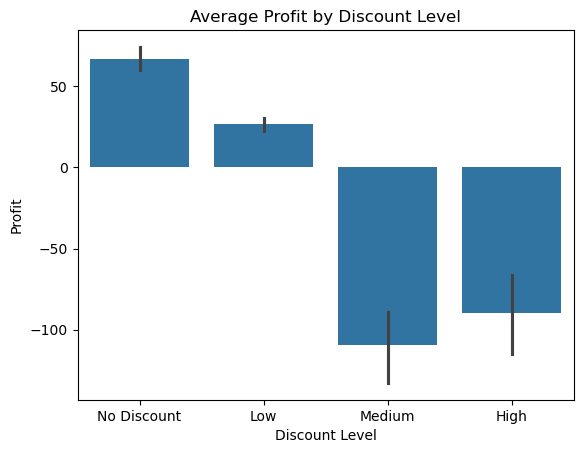

In [9]:
sns.barplot(
    data=df,
    x="Discount Level",
    y="Profit"
)
plt.title("Average Profit by Discount Level")
plt.show()

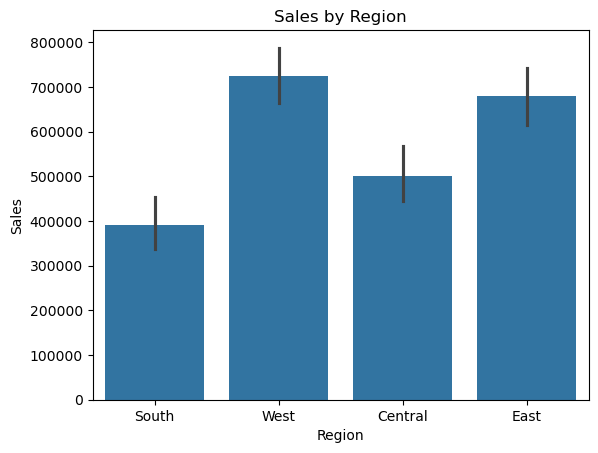

In [10]:
sns.barplot(
    data=df,
    x="Region",
    y="Sales",
    estimator=sum
)
plt.title("Sales by Region")
plt.show()

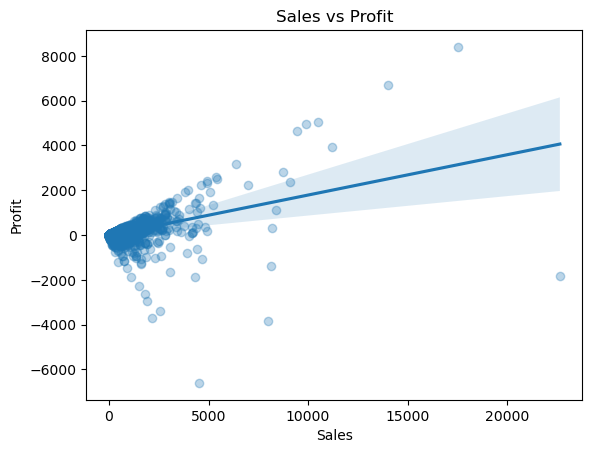

In [11]:
sns.regplot(
    data=df,
    x="Sales",
    y="Profit",
    scatter_kws={"alpha":0.3}
)
plt.title("Sales vs Profit")
plt.show()

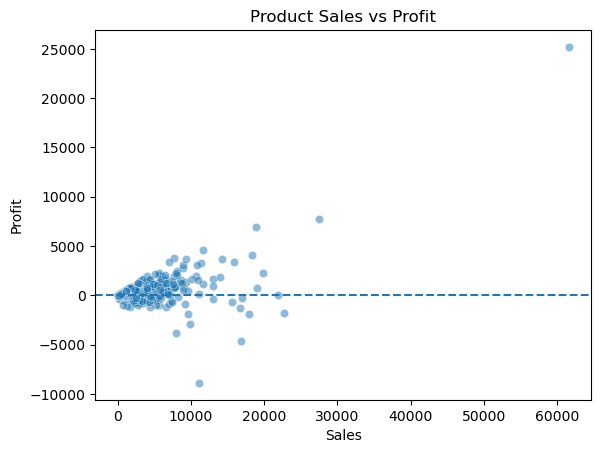

In [12]:
product_perf = df.groupby("Product Name")[["Sales", "Profit"]].sum()

sns.scatterplot(
    x=product_perf["Sales"],
    y=product_perf["Profit"],
    alpha=0.5
)
plt.axhline(0, linestyle="--")
plt.title("Product Sales vs Profit")
plt.show()

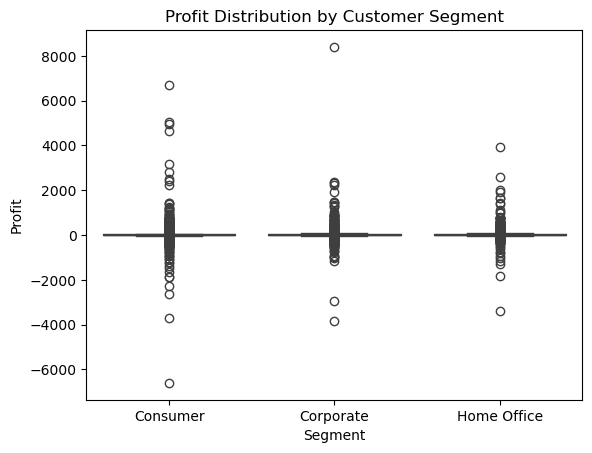

In [13]:
sns.boxplot(
    data=df,
    x="Segment",
    y="Profit"
)
plt.title("Profit Distribution by Customer Segment")
plt.show()

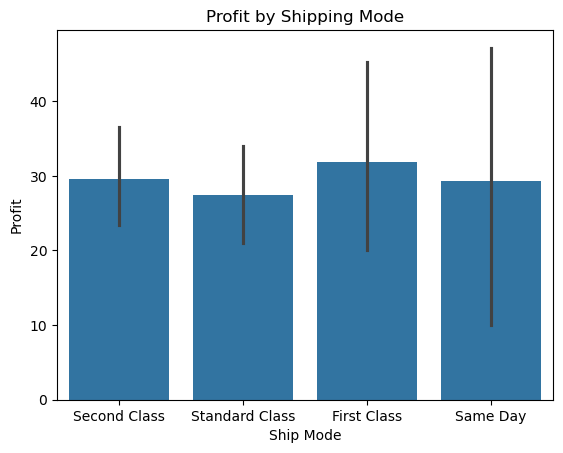

In [14]:
sns.barplot(
    data=df,
    x="Ship Mode",
    y="Profit"
)
plt.title("Profit by Shipping Mode")
plt.show()

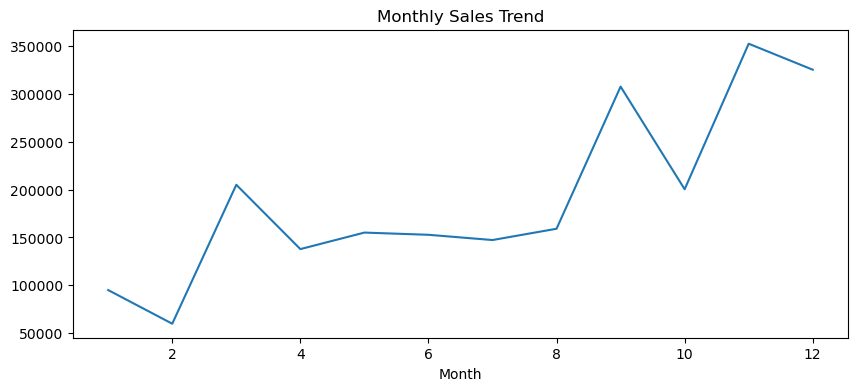

In [15]:
monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales.plot(kind="line", figsize=(10,4))
plt.title("Monthly Sales Trend")
plt.show()

2026-01-28 12:13:32.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 12:13:32.500 No runtime found, using MemoryCacheStorageManager
2026-01-28 12:13:32.504 No runtime found, using MemoryCacheStorageManager
2026-01-28 12:13:32.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 12:13:32.507 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 12:13:32.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 12:13:32.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 12:13:32.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 12:13:32.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

DeltaGenerator()

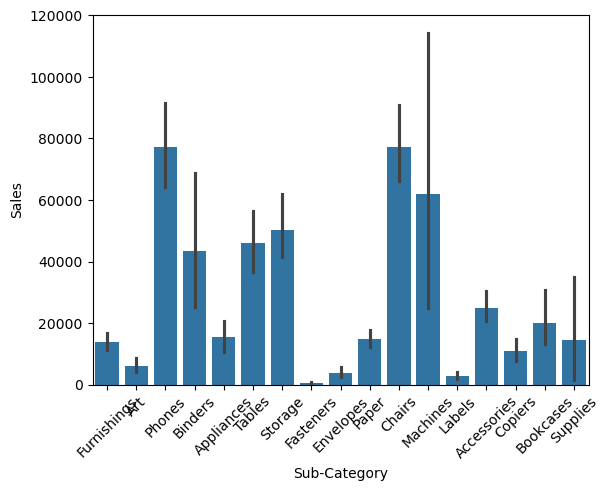

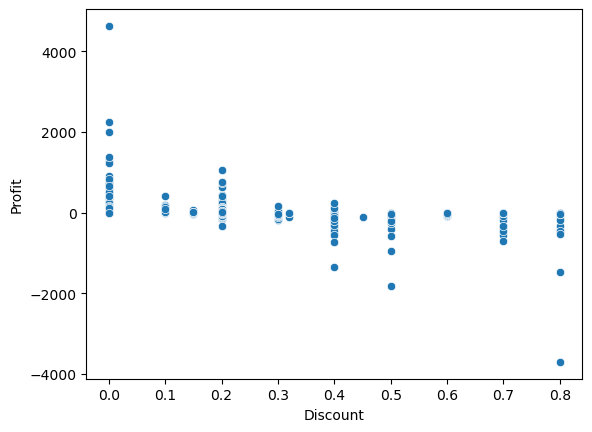

In [18]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Pricing Strategy Dashboard", layout="wide")

@st.cache_data
def load_data():
    df = pd.read_csv("C:\\Users\\sange\\OneDrive\\Attachments\\Desktop\\dataset\\Sampledataset.csv",encoding="latin1")
    df["Order Date"] = pd.to_datetime(df["Order Date"])
    df["Year"] = df["Order Date"].dt.year
    return df

df = load_data()

st.title("📦 Product Pricing Strategies & Sales Performance")

# Sidebar filters
category = st.sidebar.multiselect(
    "Select Category",
    df["Category"].unique(),
    default=df["Category"].unique()
)

year = st.sidebar.selectbox(
    "Select Year",
    sorted(df["Year"].unique())
)

filtered_df = df[
    (df["Category"].isin(category)) &
    (df["Year"] == year)
]

# KPIs
col1, col2, col3 = st.columns(3)
col1.metric("Total Sales", f"${filtered_df['Sales'].sum():,.0f}")
col2.metric("Total Profit", f"${filtered_df['Profit'].sum():,.0f}")
col3.metric("Avg Discount", round(filtered_df["Discount"].mean(),2))

# Sales by Sub-Category
st.subheader("Sales by Sub-Category")
fig, ax = plt.subplots()
sns.barplot(
    data=filtered_df,
    x="Sub-Category",
    y="Sales",
    estimator=sum,
    ax=ax
)
plt.xticks(rotation=45)
st.pyplot(fig)

# Discount vs Profit
st.subheader("Discount vs Profit")
fig, ax = plt.subplots()
sns.scatterplot(
    data=filtered_df,
    x="Discount",
    y="Profit",
    ax=ax
)
st.pyplot(fig)